In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20.4f}'.format

In [2]:
test = pd.read_csv("data/jigsaw-unintended-bias-in-toxicity-classification/test.csv")
train = pd.read_csv("data/jigsaw-unintended-bias-in-toxicity-classification/train.csv")

In [3]:
test.shape, train.shape

((97320, 2), (1804874, 45))

In [4]:
train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

### Average Toxicity of Comments with Specific Identities or Reactions

In [5]:
train[train.funny > 0].target.mean()

0.10400058616840863

In [6]:
train[train.male > 0.5].target.mean()

0.18159273674318033

In [7]:
train[train.female > 0.5].target.mean()

0.17267079276894218

In [8]:
train.head(50).style

In [9]:
train.male.unique().round(3)

array([  nan, 0.   , 0.6  , 0.167, 1.   , 0.833, 0.2  , 0.8  , 0.1  ,
       0.5  , 0.333, 0.3  , 0.9  , 0.25 , 0.4  , 0.75 , 0.7  , 0.01 ,
       0.002, 0.667, 0.009, 0.125, 0.111, 0.011, 0.819, 0.018, 0.721,
       0.973, 0.759, 0.012, 0.856, 0.857, 0.889, 0.222, 0.803, 0.162,
       0.004, 0.001, 0.026, 0.455, 0.014, 0.01 , 0.928, 0.029, 0.034,
       0.003, 0.001, 0.617, 0.003, 0.001, 0.143, 0.011, 0.001, 0.05 ,
       0.364, 0.881, 0.295, 0.156, 0.007, 0.599, 0.001, 0.286, 0.004,
       0.778, 0.714, 0.818, 0.012, 0.047, 0.091, 0.009, 0.001, 0.636,
       0.046, 0.014, 0.571, 0.919, 0.012, 0.182, 0.959, 0.005, 0.429,
       0.875, 0.037, 0.005, 0.003, 0.023, 0.132, 0.864, 0.002, 0.03 ,
       0.001, 0.815, 0.002, 0.001, 0.018, 0.98 , 0.727, 0.008, 0.003,
       0.981, 0.919, 0.816, 0.909, 0.987, 0.01 , 0.004, 0.005, 0.001,
       0.927, 0.545, 0.978, 0.015, 0.004, 0.007, 0.417, 0.02 , 0.001,
       0.006, 0.97 , 0.99 , 0.003, 0.125, 0.009, 0.556, 0.97 , 0.011,
       0.482, 0.001,

In [10]:
from lch_proprietary import ml_pipeline_lch as mp
from lch_proprietary import ml_explore as exp

In [11]:
train_summary, train_types = mp.summarize_df(train)

In [12]:
train_summary.round(4)

num_values num_nulls unique_values  \
col_name                                                                 
id                                     1804874         0       1804874   
target                                 1804874         0          2913   
comment_text                           1804874         0       1780823   
severe_toxicity                        1804874         0          1460   
obscene                                1804874         0          2417   
identity_attack                        1804874         0          2294   
insult                                 1804874         0          3042   
threat                                 1804874         0          2053   
asian                                   405130   1399744           126   
atheist                                 405130   1399744            85   
bisexual                                405130   1399744            86   
black                                   405130   1399744           128   
buddhist                                405130   1399744            65   
christian                               405130   1399744           161   
female                                  405130   1399744           205   
heterosexual                            405130   1399744           126   
hindu                                   405130   1399744            78   
homosexual_gay_or_lesbian               405130   1399744           125   
intellectual_or_learning_disability     405130   1399744            77   
jewish                                  405130   1399744           121   
latino                                  405130   1399744           105   
male                                    405130   1399744           243   
muslim                                  405130   1399744           139   
other_disability                        405130   1399744           117   
other_gender                            405130   1399744           175   
other_race_or_ethnicity                 405130   1399744           194   
other_religion                          405130   1399744           192   
other_sexual_orientation                405130   1399744           186   
physical_disability                     405130   1399744            78   
psychiatric_or_mental_illness           405130   1399744            95   
transgender                             405130   1399744           125   
white                                   405130   1399744           152   
created_date                           1804874         0       1804362   
publication_id                         1804874         0            53   
parent_id                              1026228    778646        711545   
article_id                             1804874         0        105380   
rating                                 1804874         0             2   
funny                                  1804874         0            61   
wow                                    1804874         0            15   
sad                                    1804874         0            25   
likes                                  1804874         0           170   
disagree                               1804874         0           100   
sexual_explicit                        1804874         0          1864   
identity_annotator_count               1804874         0           158   
toxicity_annotator_count               1804874         0           775   

                                    data_type col_type  \
col_name                                                 
id                                      int64       ID   
target                                float64  numeric   
comment_text                           object     tops   
severe_toxicity                       float64      geo   
obscene                               float64  numeric   
identity_attack                       float64       ID   
insult                                float64  numeric   
threat                             

In [13]:
train_types = mp.recateogrize_col(col='toxicity_annotator_count', new_category='numeric', col_dict = train_types)
train_types = mp.recateogrize_col(col='identity_annotator_count', new_category='numeric', col_dict = train_types)
train_types = mp.recateogrize_col(col='identity_attack', new_category='numeric', col_dict = train_types)
train_types = mp.recateogrize_col(col='rating', new_category='multi', col_dict = train_types)
train_types = mp.recateogrize_col(col='severe_toxicity', new_category='numeric', col_dict = train_types)
train_types = mp.recateogrize_col(col='other_race_or_ethnicity', new_category='numeric', col_dict = train_types)
train_types = mp.recateogrize_col(col='comment_text', new_category='multi', col_dict = train_types)
train_types = mp.recateogrize_col(col='created_date', new_category='multi', col_dict = train_types)

In [14]:
train_types

defaultdict(list,
            {'ID': ['id', 'publication_id', 'parent_id', 'article_id'],
             'numeric': ['target',
              'obscene',
              'insult',
              'threat',
              'asian',
              'atheist',
              'bisexual',
              'black',
              'buddhist',
              'christian',
              'female',
              'heterosexual',
              'hindu',
              'homosexual_gay_or_lesbian',
              'intellectual_or_learning_disability',
              'jewish',
              'latino',
              'male',
              'muslim',
              'other_disability',
              'other_gender',
              'other_religion',
              'other_sexual_orientation',
              'physical_disability',
              'psychiatric_or_mental_illness',
              'transgender',
              'white',
              'funny',
              'wow',
              'sad',
              'likes',
              'disagree

In [15]:
train.loc[train['article_id']==352700].style

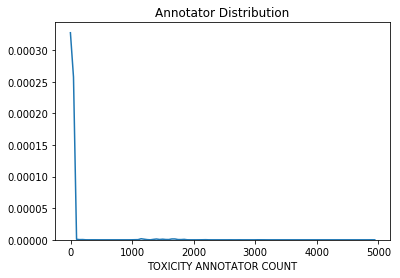

In [16]:

annotator_dist = sns.distplot(train['toxicity_annotator_count'], hist=False)
renamed_x = annotator_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
annotator_dist.set_xlabel(renamed_x)
annotator_dist.set_title("Annotator Distribution")
plt.show()

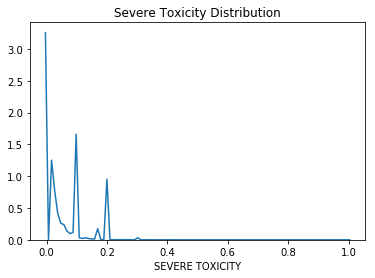

In [17]:
severe_toxicity_dist = sns.distplot(train['severe_toxicity'], hist=False)
renamed_x = severe_toxicity_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
severe_toxicity_dist.set_xlabel(renamed_x)
severe_toxicity_dist.set_title("Severe Toxicity Distribution")
plt.show()

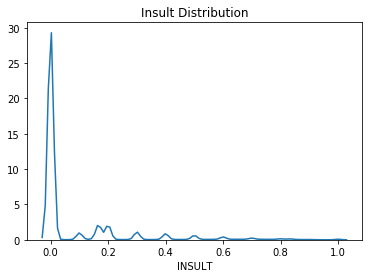

In [18]:
insult_dist = sns.distplot(train['insult'], hist=False)
renamed_x = insult_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
insult_dist.set_xlabel(renamed_x)
insult_dist.set_title("Insult Distribution")
plt.show()

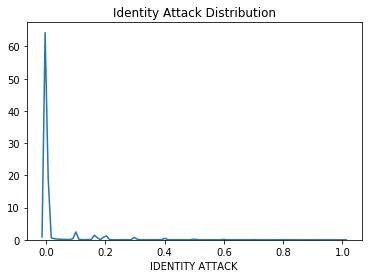

In [19]:
identity_dist = sns.distplot(train['identity_attack'], hist=False)
renamed_x = identity_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
identity_dist.set_xlabel(renamed_x)
identity_dist.set_title("Identity Attack Distribution")
plt.show()

In [20]:
train['toxicity_annotator_count'].describe()

count           1804874.0000
mean                  8.7847
std                  43.5009
min                   3.0000
25%                   4.0000
50%                   4.0000
75%                   6.0000
max                4936.0000
Name: toxicity_annotator_count, dtype: float64

In [21]:
train.loc[train['toxicity_annotator_count'] > 10]

id               target  \
4          59856               0.8936   
5          59859               0.6667   
6          59861               0.4576   
11        239579               0.4400   
31        239607               0.9125   
34        239612               0.8308   
59        239655               0.3611   
225       239984               0.5070   
289       240311               0.9688   
369       240424               0.8030   
391       240450               0.7818   
400       240461               0.8667   
438       240509               0.8030   
452       240524               0.2727   
492       240586               0.5571   
508       240615               0.8182   
509       240616               0.0909   
648       240878               0.5455   
649       240879               0.7778   
697       240941               0.7941   
700       240944               0.7606   
703       240947               0.6618   
727       240978               0.5455   
852       241137               0.3913   
956       241282               0.8788   
996       241346               0.6296   
1173      241807               0.9077   
1285      241955               0.0018   
1489      242413               0.0069   
1565      242494               0.0009   
...          ...                  ...   
1804345  6333111               0.5263   
1804355  6333123               0.4375   
1804356  6333125               0.6351   
1804371  6333155               0.5938   
1804394  6333187               0.4328   
1804420  6333222               0.5571   
1804423  6333227               0.8571   
1804467  6333295               0.3529   
1804474  6333305               0.6111   
1804477  6333308               0.1136   
1804478  6333309               0.4267   
1804493  6333331               0.3158   
1804510  6333356               0.1961   
1804512  6333358               0.7167   
1804524  6333372               0.8667   
1804534  6333384               0.6375   
1804568  6333434               0.3016   
1804600  6333475               0.8056   
1804614  6333499               0.6143   
1804700  6333642               0.5750   
1804712  6333661               0.8627   
1804713  6333662               0.8000   
1804715  6333665               0.2742   
1804725  6333676               0.7500   
1804754  6333723               0.1400   
1804758  6333733               0.6129   
1804786  6333775               0.6000   
1804825  6333841               0.8333   
1804836  6333868               0.1957   
1804872  6334009               0.6212   

                                              comment_text  \
4                     haha you guys are a bunch of losers.   
5                                     ur a sh*tty comment.   
6                              hahahahahahahahhha suck it.   
11       This is a great story. Man. I wonder if the pe...   
31       Yet call out all Muslims for the acts of a few...   
34       This bitch is nuts. Who would read a book by a...   
59                                 Send more dildos, STAT.   
225      Metro has lied to us from the beginning about ...   
289                                       You're an idiot.   
369      Sorry to have to do this, but just to see if p...   
391      THIS IS A TEST: \n\nAny fool knows Star Trek i...   
400      testing purposes: \n\nyou are an idiot and i c...   
438      For the purposes of testing, here's my contrib...   
452      Really? This article is actually news? My daug...   
492      People can use toothpaste if they so desire an...   
508      Well shit, they drafted a guide.  We should al...   
509      I've seen HRC called a bit__, a Nazi, etc. by ...   
648      This is what a serious mental illness looks li...   
649      "Real freedom"? Freedom to kill wantonly when ...   
697      I honestly cannot decide if these guys are com...   
700      There will always be idiots doing something st...   
703      They are a bunch of millionaire wannabe agribu...   
727      Love it!  Alas, though, there are no

In [22]:
train.loc[train['toxicity_annotator_count'] > 1000]

id               target  \
1285      241955               0.0018   
1489      242413               0.0069   
1565      242494               0.0009   
1618      242557               0.2382   
2521      244150               0.9730   
3803      245837               0.0054   
4381      246937               0.0007   
5004      247685               0.9405   
6036      248913               0.0167   
6613      249635               0.0047   
6667      249698               0.0000   
7133      250318               0.0474   
7681      251007               0.0106   
8227      251984               0.9885   
8257      252025               0.9254   
9134      253538               0.0009   
9796      254319               0.0019   
10076     254659               0.0028   
10329     254965               0.9824   
12653     257756               0.9871   
15581     261308               0.0952   
17233     263349               0.0022   
17719     263916               0.8488   
18011     264253               0.7453   
19116     265603               0.9583   
19732     266352               0.9682   
20999     267822               0.0042   
22529     269673               0.0028   
24527     272036               0.0022   
26268     274055               0.0017   
...          ...                  ...   
1762013  6281211               0.0022   
1763653  6283171               0.0303   
1767161  6287395               0.0749   
1767616  6287912               0.0180   
1768145  6288516               0.1023   
1770638  6291368               0.8307   
1772544  6293716               0.0227   
1775641  6297649               0.0154   
1777119  6299592               0.0142   
1780556  6304000               0.9754   
1780774  6304272               0.9461   
1781027  6304557               0.9815   
1781698  6305373               0.0298   
1782248  6306018               0.0120   
1782425  6306227               0.0038   
1782761  6306622               0.0007   
1783562  6307594               0.9059   
1783752  6307827               0.9805   
1783888  6307989               0.8970   
1784952  6309259               0.9731   
1788090  6312975               0.0000   
1788914  6313951               0.8758   
1789628  6314817               0.0000   
1792650  6318384               0.8175   
1794445  6320447               0.2382   
1798450  6325294               0.0162   
1799973  6327197               0.8687   
1801717  6329585               0.8773   
1802370  6330519               0.0112   
1803835  6332408               0.8701   

                                              comment_text  \
1285     This is a predictable side effect of the conti...   
1489                     Can you be sure it wasn't ironic?   
1565                           Can you link to the source?   
1618     I think it's a bit misleading to say that blac...   
2521     F u c k the homeless. The people giving handou...   
3803     The facts are that a majority of registered vo...   
4381     Fantastic!  Outdoor School for ALL kids, not j...   
5004        Child rape is cool, if the right people do it.   
6036     The only thing worse than a sales tax in Orego...   
6613     NYC rates are 3 times higher (or more) than ma...   
6667     In Portland Lyft just announce a flat rate fro...   
7133                  And worst of all, he smoked tobacco!   
7681     Someone whose house is in foreclosure just isn...   
8227                         Throw his lousy ass in jail !   
8257     You forgot his most important stat, which is h...   
9134                                            Nice save!   
9796     Churchill  High School is located at the inter...   
10076    My cousin worked for many years as a special e...   
10329                                     Damn Christians!   
12653    What the fuck is with this 'civil comments' ho...   
15581    It might be that Bernie is the honest choice a...   
17233    "Resist an urge, just once, to teach or correc...   
17719    I explained exactly why you are an i

In [23]:
train.loc[train['toxicity_annotator_count'] > 2000]

id               target  \
40665     291317               0.9330   
50187     303166               0.9115   
196259    481560               0.9484   
202328    489102               0.9611   
203250    490366               0.9915   
220969    513241               0.9889   
262502    564543               0.9415   
295288    603737               0.9733   
323244    638317               0.9674   
331822    648425               0.9907   
385323    713989               0.8138   
437496    779270               0.9845   
704861   4985045               0.9002   
769534   5061886               0.9896   
814774   5118044               0.9848   
869602   5184619               0.9374   
959751   5292392               0.9457   
997408   5337441               0.9708   
1015620  5359434               0.9922   
1026767  5372672               0.7013   
1030056  5376385               0.9547   
1033329  5380193               0.9806   
1096693  5456689               0.9897   
1117130  5481314               0.9062   
1135497  5503282               0.0024   
1173948  5550415               0.0069   
1182962  5561985               0.0033   
1195306  5576653               0.0018   
1204896  5588434               0.9415   
1256258  5650541               0.0227   
...          ...                  ...   
1341641  5755269               0.0086   
1343565  5757519               0.9922   
1369783  5791927               0.8722   
1419190  5853492               0.0060   
1423718  5858827               0.9728   
1434106  5872251               0.9265   
1435727  5874230               0.0224   
1474588  5924394               0.9868   
1476397  5926599               0.9124   
1477409  5927841               0.9901   
1479819  5931059               0.0291   
1483744  5935917               0.9607   
1495140  5950375               0.9891   
1495632  5950976               0.8849   
1500621  5956974               0.9732   
1506594  5964927               0.9844   
1511298  5970574               0.9792   
1527704  5991222               0.9741   
1548046  6016502               0.0056   
1553668  6022990               0.0014   
1570905  6044035               0.0122   
1576388  6050629               0.0009   
1578349  6053084               0.1025   
1579173  6054129               0.0050   
1613205  6097161               0.0139   
1635364  6125468               0.9169   
1695690  6201049               0.0056   
1728495  6241616               0.9820   
1763653  6283171               0.0303   
1768145  6288516               0.1023   

                                              comment_text  \
40665    Someone should stomp her face into a puddle of...   
50187    I would love to punch both of them in the mout...   
196259   Try not to let every Muslim foreigner cut your...   
202328                         I will burn your house down   
203250          Stupid hispanics, ruining it for everyone.   
220969   went to school with that stupid faggot.. looks...   
262502   Now take him out back and put a bullet through...   
295288                              You're such a dick. :)   
323244   Why are women such depraved sexual miscreant B...   
331822             garbage like you should be incinerated!   
385323   Moderate Islam is indistinguishable from viole...   
437496   Enough of this shit. Just nuke the entire Midd...   
704861   Great Angela! Punch the other girl in the face...   
769534                      Shut up and show us your tits.   
814774   You can stick your dick up anyone's butt. Why ...   
869602   when they find the boy, put this loser in the ...   
959751   I hope you die today. The world will be much b...   
997408       Blacks and browns are huge drains on society!   
1015620                         this report is gay as fuck   
1026767  Line them up make the first guy dog his own ho...   
1030056  Where did I say this lawyer is corrupt? I don'...   
1033329  I bet your fat bitter little nerd ass was wait...   
1096693          Chinese people are really, r

In [40]:
def individual_distribution(df, col_name, hist=False, ax=None, dropna=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
    if dropna:
        col_dist = sns.distplot(df[col_name].dropna(), hist=hist, ax=ax)
    else:
        col_dist = sns.distplot(df[col_name], hist=hist, ax=ax)
    renamed_x = col_dist.get_xlabel()
    renamed_x = renamed_x.replace('_', ' ').upper()
    col_dist.set_ylabel('FREQUENCY')
    col_dist.set_xlabel(renamed_x)
    col_dist.set_title(renamed_x + " DISTRIBUTION")
    return ax


In [25]:
def view_dist(df, geo_columns=True, fig_size=(20,15), labels = None, bins=10,
              density=False, sharey=False, ncols=4, categorical_keywords=None,
              total_plot_width=25):
    '''
    Plot distributions of non-categorical columns in a given dataframe

    Inputs:
        df: pandas dataframe
        geo_columns: list of column names corresponding to columns with numeric 
        geographical information (ex: zipcodes) 
        labels: list of labels to apply to plot: title, xlabel, ylabel, respectively
    '''
    non_categoricals = exp.isolate_categoricals(df, categoricals_fcn=exp.is_category, 
        ret_categoricals=False, keywords=categorical_keywords, geos_indicator=geo_columns)

    num_metrics = len(non_categoricals)

    fig, axs, rows, axes_to_remove = exp.generate_axes(ncols=ncols, num_metrics=num_metrics, 
                                                   total_plot_width=total_plot_width, sharey=sharey)

    # set a different distribution to be plotted in each subplot
    ax_col = -1
    ax_row = 0
    col_num = 0

    while col_num < num_metrics:
        print(col_num)
        col = non_categoricals[col_num]

        current_subplot, ax_row, ax_col = exp.iterate_subplots(axs, ncols, rows, ax_col, ax_row)

        individual_distribution(df=df, col_name=col, hist=False, ax=current_subplot) 
        col_num += 1
    
        # disable axes not being used
    if axes_to_remove > 0:
        for i in np.arange(axes_to_remove):
            axs[-1, -(i + 1)].axis('off')
    
    fig.suptitle('NON-CATEGORICAL FEATURE DISTRIBUTIONS', fontsize=20)
    plt.show()

In [ ]:
view_dist(train)

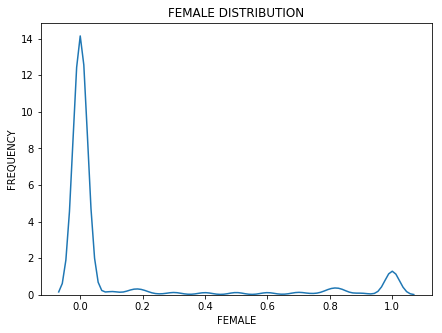

In [41]:
individual_distribution(df=train, col_name='female', dropna=True)

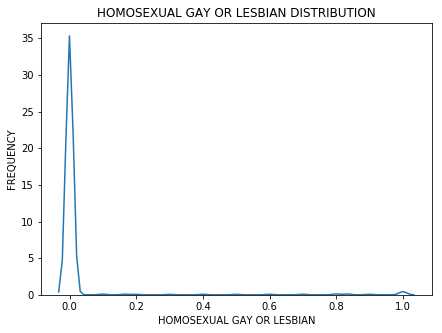

In [42]:
individual_distribution(df=train, col_name='homosexual_gay_or_lesbian', dropna=True)

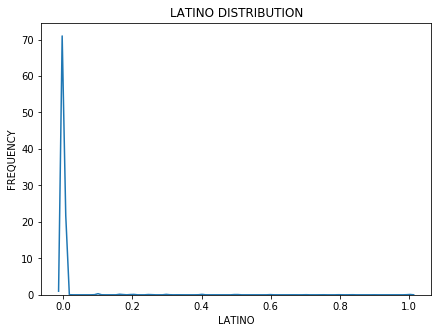

In [43]:
individual_distribution(df=train, col_name='latino', dropna=True)

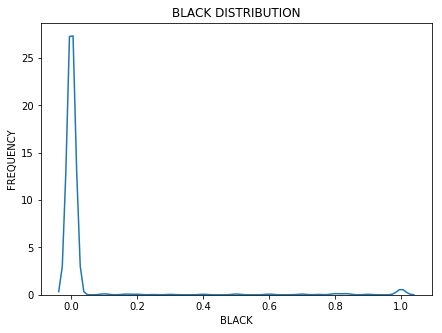

In [44]:
individual_distribution(df=train, col_name='black', dropna=True)

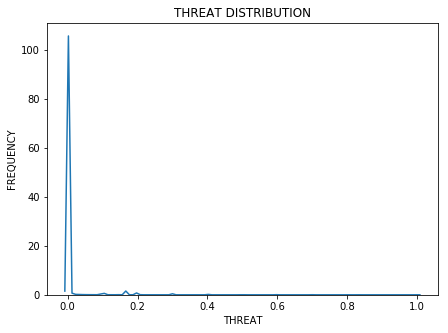

In [38]:
threat_dist = individual_distribution(df=train, col_name='threat')

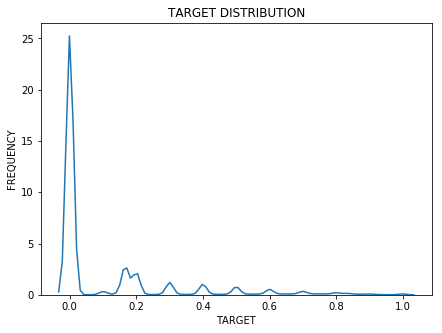

In [39]:
target_dist = individual_distribution(df=train, col_name='target')